In [1]:
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#pre - Processing class just like a library
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [3]:
class PCA_():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]

        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
        return self




In [4]:
X, y  = fetch_openml('mnist_784',
                     version=1,
                     return_X_y=True,
                     as_frame = True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
display(X.shape,y.shape)

(70000, 784)

(70000,)

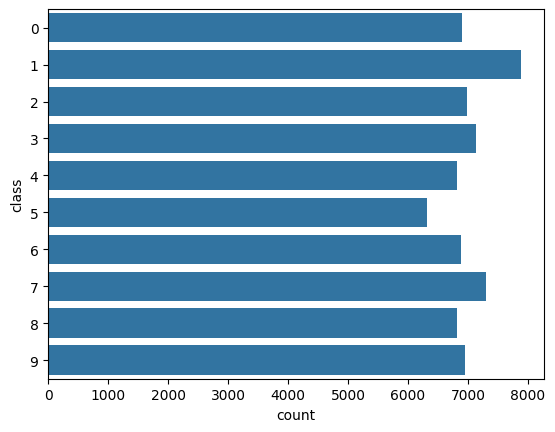

In [6]:
sns.countplot(y, color = sns.color_palette()[0]);

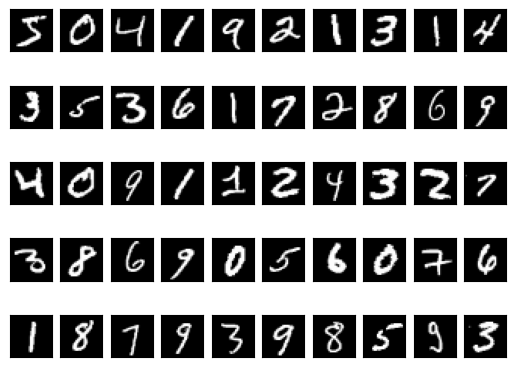

In [7]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images):
            plt.subplot(int(num_images/10), 10, digit_num+1)  # Convert to integer
            mat_data = X.iloc[digit_num].values.reshape(28, 28)  # Reshape images
            plt.imshow(mat_data, cmap='gray')  # Plot the data
            plt.xticks([])  # Removes numbered labels on x-axis
            plt.yticks([])  # Removes numbered labels on y-axis
        plt.show()  # Display the plot

show_images(50)


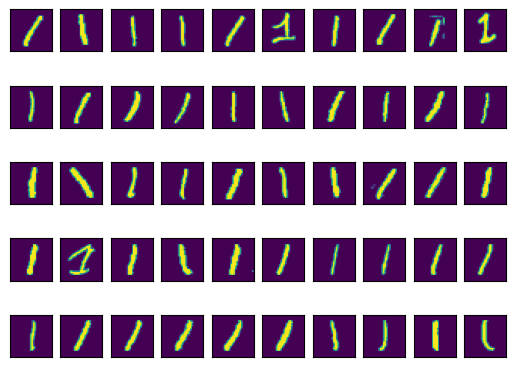

In [8]:
def show_images_by_digit(digit_to_see):
    if int(digit_to_see) in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50):
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit('1')

In [9]:
transformed=StandardScaler().fit_transform(X)
standardized_data = np.nan_to_num(transformed)

In [10]:
pca = PCA_(no_of_components=784)
pca.fit(standardized_data)

In [11]:
len(pca.explained_variance_ratio)

784

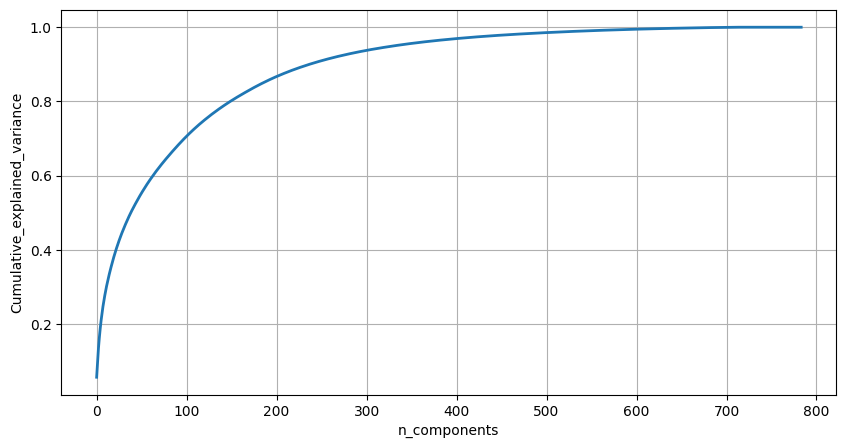

In [12]:

percentage_var_explained = pca.explained_variance/ np.sum(pca.explained_variance);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [13]:
feat_var_list = list(zip(range(1,784), pca.explained_variance_ratio.cumsum()))

for item in feat_var_list:
  if item[1] > 0.95:
      print(item)

(332, 0.9500311796713791)
(333, 0.950388112842584)
(334, 0.9507435662155332)
(335, 0.9510977901338141)
(336, 0.9514496546991921)
(337, 0.951799252976365)
(338, 0.9521451475481609)
(339, 0.9524899136885966)
(340, 0.9528303922231252)
(341, 0.953166478964343)
(342, 0.9534998389931472)
(343, 0.9538317204702393)
(344, 0.9541606490897715)
(345, 0.9544849151414373)
(346, 0.9548052265353213)
(347, 0.9551246192603084)
(348, 0.9554417797206329)
(349, 0.9557549074163101)
(350, 0.9560663548913186)
(351, 0.9563768508987074)
(352, 0.9566855293451612)
(353, 0.9569918180060811)
(354, 0.9572968362163786)
(355, 0.9575996093237915)
(356, 0.957899039583707)
(357, 0.9581975628079041)
(358, 0.95849378021157)
(359, 0.9587839947002134)
(360, 0.9590729485105479)
(361, 0.9593593351233486)
(362, 0.9596444416909822)
(363, 0.9599279161433495)
(364, 0.9602099123284099)
(365, 0.9604905801195975)
(366, 0.9607704152912484)
(367, 0.9610482839815161)
(368, 0.9613236856058901)
(369, 0.9615984384462661)
(370, 0.9618726375

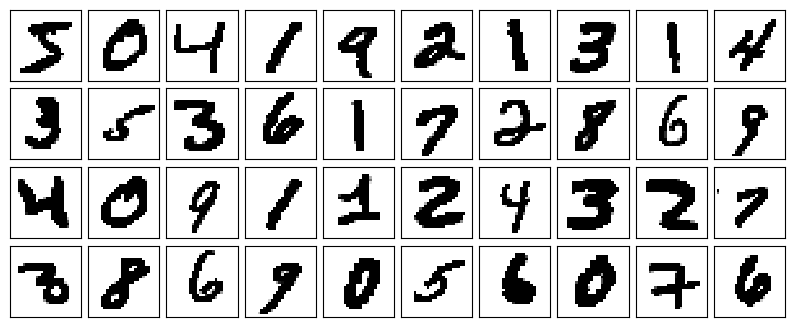

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(X.values)

In [14]:
pca = PCA_(no_of_components=332)
pca.fit(standardized_data)

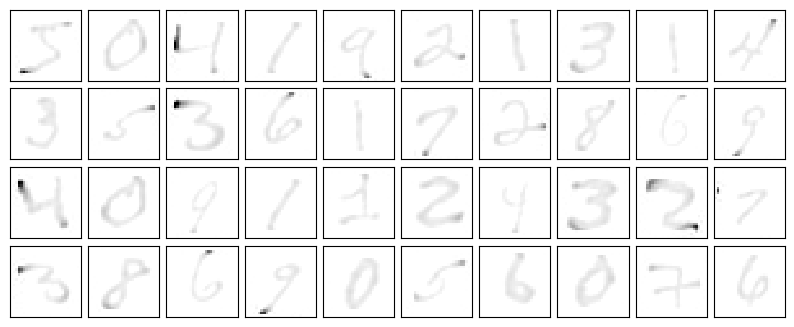

In [17]:
components = pca.transform(standardized_data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)